### Het plan

D

Hoe bereken je de groei van FlickBike? In het bijzonder: hoe voorspel je het aantal verhuurde fietsen op de dagen tussen 10 december 2019 en 31 januari 2020? 

### 1 Hoe bereken je  de groei van FlickBike? In het bijzonder: hoe voorspel je het aantal verhuurde fietsen op de dagen tussen 10 december 2019 en 31 januari 2020? 
Eerst zal ik kijken wat de seizoen effecten zijn

Ik zal kijken of de groei te normaliseren is.

Als eerste poging zal ik hiervoor eerst de dagen nemen met het zelfde soort weer. Dus bijvoorbeeld alle dagen waar de temperatuur tussen 15 en 25 graden licht en waar het niet heeft geregend. Hieruit kan ik een groei formule opstellen. 

Hierna maak ik een tweede model dat de afwijking voorspelt van het voorspelde gebruik op een bepaalde dag. Mijn model zou dan voor een normalen situatie voorspellen hoeveel gebruik er zal zijn op bijvoorbeeld 30 januari 2020. Daar komt dan een waarden uit zoals 400 verhuren op een dag. Mijn tweede model kijkt dan naar de factoren van een dag en bepaald welk effect dit heeft op het aantal. Dus bijvoorbeeld het regent dus gebruik neemt met 80% af en geeft dan terug 400 * 0.2 = 80 verhuringen 

### Welke invloeden verwacht je van, en op welke manier kun je je model gevoelig maken voor: 
##### Het weer. 
Op zonnige dagen en dagen waar het niet regent zullen er meer mensen met de fiets gaan  
##### De dag van de week.  
Aangezien de bikes voornamelijk voor woon werk verkeer worden gebruikt zal in het weekend en op feestdagen het gebruik dalen.
Bijzondere dagen in het jaar, zoals feestdagen, schoolvakanties, etc. 
Zie 2
Eventueel andere factoren. 
Vakantie seizoen. Aangezien het op een vliegveld wordt gebruikt is er een kans dat er tijdens de vakanties meer arbeid nodig is en de fietsen meer gebruikt kunnen worden. Misschien is dat nog geen groot genoegen factor nu maar dat is wel iets dat je kan gaan merken als het bedrijf is gegroeid.
Net na nieuwjaar. Net na nieuwjaar hebben mensen goede voornemens en willen ze misschien vaker gaan fietsen. Dit kan een stijging veroorzaken.



### 2 Hoe kan, op basis van data, worden voorspeld waar er tekorten van fietsen dreigen te ontstaan en hoe de fietsen het beste zo kunnen worden verplaatst dat ze zowel over het hele terrein van Schiphol-Oost beschikbaar zijn en tegelijkertijd vooral beschikbaar zijn op plaatsen waar het regelmatig druk is? 
Ik zal de dag opdelen in een aantal periode. Ochtend, Middag, Avond, Nacht.
Ochtend = 5:00 tot 12:00
Middag  = 12:00 tot 15:00
Avond    = 15:00 tot 21:00
Nacht    = 21:00 tot 5:00

Deze tijden zijn niet definitief maar zullen op experimentelen wijzen worden verfijnd.
Voor elke periode zal op elke dag een cluster worden gemaakt. Dan zullen de verschillende periode van de verschillende dagen (dus ochtend dag 1 met ochtend dag 2) worden vergeleken en hier nieuwe clusters van worden gemaakt. Het uiteindelijke resultaat is x locaties voor elke periode van een dag waar de fietsen naartoe kunnen worden gebracht.


### 3 Hoe kun je berekenen met hoeveel fietsen zou FlickBike minimaal kunnen werken, zodanig dat te verwachten pieken op te vangen zijn?
Met hoeveel fietsen zou FlickBike minimaal kunnen werken, zodanig dat te verwachten pieken op te vangen zijn?
Ik zal opzoeken wanneer de pieken zijn. Ik zal kijken hoeveel fietsen er dan worden gebruikt. Ik zal voor deze momenten een groei formule bereken zoals ik bij 1 heb gedaan. Hiermee kan ik een schatting maken wanneer er hoeveel fietsen nodig zijn

### 4 Visualisatie :
4	Voor 1 zou ik een lijn grafiek maken
5	Voor 2 zal ik de punten op een kaart laten zien voor elke periode
6	Voor 3 kan een gebruiker een dag opvragen en krijgt dan een bar chart te zien met de beschikbare fietsen en de vragen die ik voorspel



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns;
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
df = pd.read_csv("../data/bikes.csv")
df.date = pd.to_datetime(df.date)
df.head()

,Unnamed: 0,tripid,userid,bikeid,account,bikenumber,start_time,end_time,start_lat,start_lng,end_lat,end_lng,date
0,1,33838,13452,382,AR,6631000433,2019-01-01 06:46:03,2019-01-01 06:46:03,52.296065,4.787667,52.296200,4.787679,2019-01-01 06:46:00
1,2,33839,13452,812,AR,6631000146,2019-01-01 06:47:39,2019-01-01 06:47:39,52.295938,4.788336,52.295940,4.788557,2019-01-01 06:47:35
2,3,33851,13182,238,AR,6631000443,2019-01-01 14:15:36,2019-01-01 14:15:36,52.307337,4.807633,52.307336,4.807630,2019-01-01 14:15:32
3,4,33852,13182,238,AR,6631000443,2019-01-01 14:33:50,2019-01-01 14:33:50,52.308478,4.809970,52.308537,4.810099,2019-01-01 14:33:46
4,5,33867,12674,787,AG,6631000283,2019-01-01 20:11:05,2019-01-01 20:11:05,52.506522,4.727323,52.506809,4.732135,2019-01-01 20:11:01


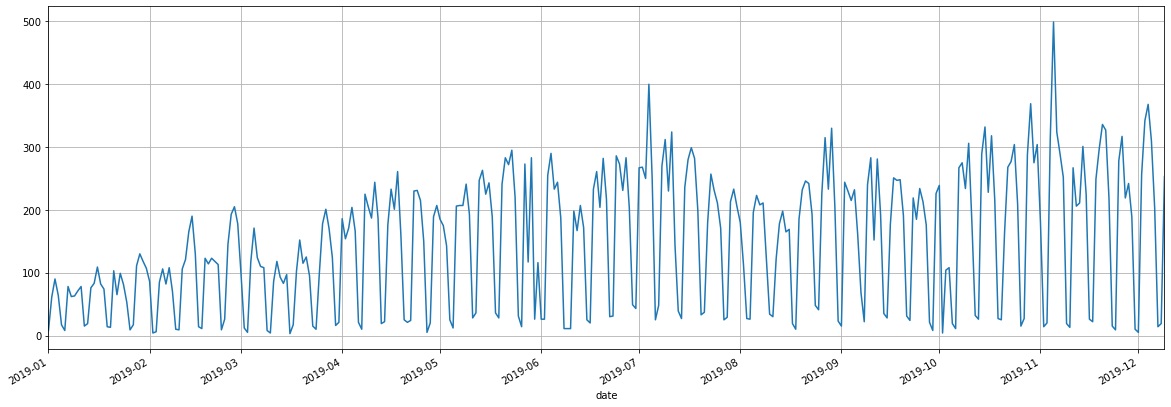

In [3]:
df_days = df['date'].groupby(df.date.dt.floor('d')).count()
df_days.plot(figsize=[20,7])
plt.grid()

# Invloed dag van de week

Text(0.5, 1.0, 'Gemiddeld aantal fietsen verhuurd per weekdag')

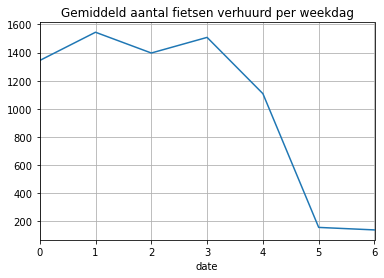

In [4]:
df_weekdays = df['date'].groupby(df.date.dt.weekday).count()
df_weekdays /= len(df_weekdays)
df_weekdays.plot()
plt.grid()
plt.title("Gemiddeld aantal fietsen verhuurd per weekdag")

# Invloed weer

In [5]:
# Read File
df_weather = pd.read_csv('KNMI_20191231.txt', sep=",", header=None)
df_weather.columns = ['location_id','date','sun_duration' ,'temp_max','rain_sum']

df_weather["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
# Convert 0.1 to 1
df_weather['temp_max'] = df_weather['temp_max'] /10

df_weather.head()

,location_id,date,sun_duration,temp_max,rain_sum
0,240,2019-01-01 06:46:00,91,1.3,2
1,240,2019-01-01 06:47:35,71,0.4,-1
2,240,2019-01-01 14:15:32,68,4.6,-1
3,240,2019-01-01 14:33:46,68,0.0,-1
4,240,2019-01-01 20:11:01,81,0.0,1


[]

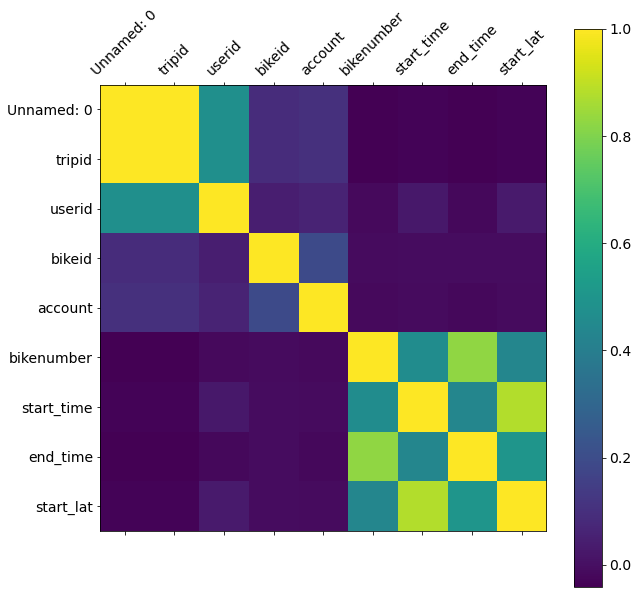

In [6]:
f = plt.figure(figsize=(10,10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.plot()

Text(0.5, 1.0, 'Max temperatuur per dag')

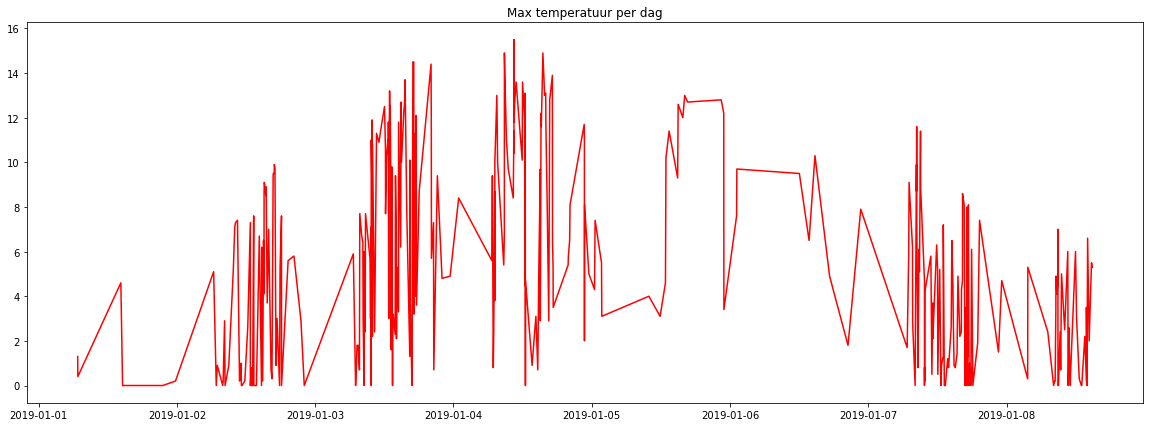

In [7]:
plt.figure(figsize=[20,7])
plt.plot(df_weather.date, df_weather.temp_max, color='red', label='Max temperatuur')
plt.title("Max temperatuur per dag")

Text(0.5, 1.0, 'Regenval per dag')

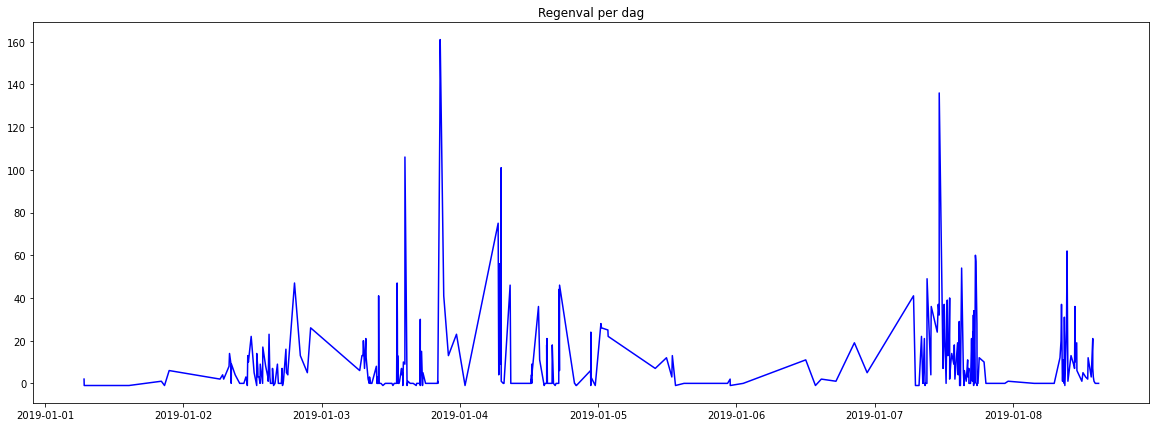

In [8]:
plt.figure(figsize=[20,7])
plt.plot(df_weather.date, df_weather.rain_sum, color='blue', label='Regensom')
plt.title("Regenval per dag")

Text(0.5, 1.0, 'Zonneschijn per dag')

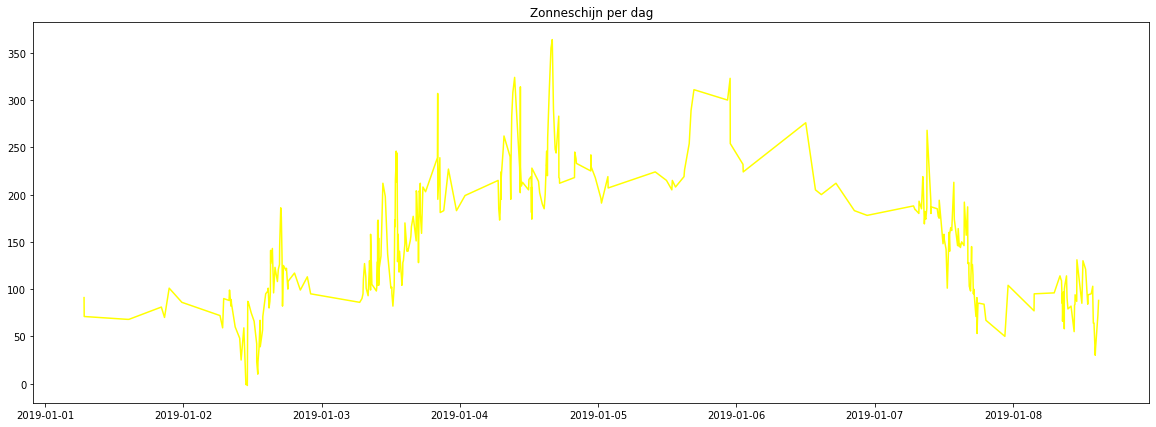

In [9]:
plt.figure(figsize=[20,7])
plt.plot(df_weather.date, df_weather.sun_duration, color='yellow', label='Zonneschijn duratie')
plt.title("Zonneschijn per dag")

In [10]:
counts = pd.Series(df_days.values)
df_weather.corrwith(counts)

location_id          NaN
sun_duration    0.165618
temp_max        0.098477
rain_sum        0.026567
dtype: float64

# Invloed feestdagen

In [11]:
holidays = [
    '2019-01-01',
    '2019-04-19',
    '2019-05-30'
]
for holiday in holidays:
    print(df_days)
    print(holiday, ":",df_days[holiday])

date
2019-01-01      8
2019-01-02     61
2019-01-03     90
2019-01-04     64
2019-01-05     17
             ... 
2019-12-05    310
2019-12-06    203
2019-12-07     14
2019-12-08     19
2019-12-09    253
Name: date, Length: 342, dtype: int64
2019-01-01 : 8
date
2019-01-01      8
2019-01-02     61
2019-01-03     90
2019-01-04     64
2019-01-05     17
             ... 
2019-12-05    310
2019-12-06    203
2019-12-07     14
2019-12-08     19
2019-12-09    253
Name: date, Length: 342, dtype: int64
2019-04-19 : 160
date
2019-01-01      8
2019-01-02     61
2019-01-03     90
2019-01-04     64
2019-01-05     17
             ... 
2019-12-05    310
2019-12-06    203
2019-12-07     14
2019-12-08     19
2019-12-09    253
Name: date, Length: 342, dtype: int64
2019-05-30 : 26


## Indivuduelen gebruiker

Hier kijken we naar het gebruik van de fietsen door de gebruikers. Er wordt geken hoe vaak een gebruiker een fiets heeft gehuurd. 

In [12]:
person = df['userid'].groupby(df.userid).count()
person.describe()

count    4027.000000
mean       12.509809
std        23.766177
min         1.000000
25%         2.000000
50%         4.000000
75%        12.000000
max       291.000000
Name: userid, dtype: float64

# Dagelijks gebruik

Hierin gaan wij kijken op welke momenten in de dag de fietsen het meest worden gebruikt

In [13]:
df_hours = df['date'].groupby(df.date.dt.hour).count()
df_hours

date
0      121
1       64
2       63
3       66
4       44
5      170
6     1165
7     2756
8     5208
9     4082
10    3464
11    3500
12    4935
13    3649
14    4001
15    4756
16    4455
17    4029
18    1489
19     756
20     526
21     369
22     460
23     249
Name: date, dtype: int64

Text(0.5, 1.0, 'Gemiddeld fietsen verhuurd dag')

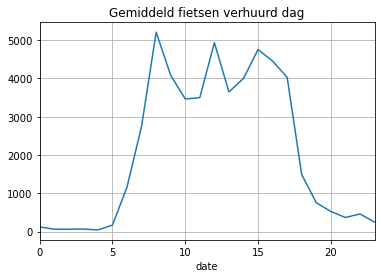

In [14]:
df_hours
df_hours.plot()
plt.grid()
plt.title("Gemiddeld fietsen verhuurd dag")

Hierin zie je dat je een duidelijke ochtend, middag en avond piek hebt.
Ochtend = 06:00 tot 09:00
Middag  = 12 uur (luch pauzen)
Avond   = vanaf 3 uur vertrekken mensen naar huis